# Imports

In [1]:
import pandas as pd # dataframes
from sklearn.ensemble import IsolationForest # anomaly detection
from sklearn.decomposition import PCA # primary component analysis
import matplotlib.pyplot as plt # plots

# Data Inspection

Reading the data

In [2]:
data = pd.read_csv('./data/hcvdat11_Anomaly.csv', )

In [3]:
data.head(1)

,Unnamed: 0,Age,Sex,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,1,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0


Drop the malformatted index-column at the beginning.

In [4]:
data.drop(columns=['Unnamed: 0'], inplace=True)

Principal Component Analysis (PCA) does not work well with categorical variables.

One-Hot-Encoding could enable PCA for e.g. binary variables but could also introduce errors.

Therefore, drop the column 'Sex':

In [5]:
data.drop(columns=['Sex'], inplace=True)
data

,Age,ALB,ALP,ALT,AST,BIL,CHE,CHOL,CREA,GGT,PROT
0,32,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69.0
1,32,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,32,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,32,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,32,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...
95,40,45.0,74.2,20.9,29.1,12.0,9.10,6.29,92.0,24.1,74.1
96,40,39.1,66.5,33.3,32.9,14.8,7.87,4.91,88.0,18.5,68.8
97,40,45.1,63.4,39.6,31.4,19.7,11.31,4.74,91.0,18.2,81.1
98,40,45.4,52.9,41.3,26.2,10.6,10.27,6.85,82.0,40.2,76.6


In [6]:
# TODO: Are the features normally-distributed?
# (Requirement of PCA)

In [7]:
# TODO: Either standardize or remove outliers before PCA as outliers obscure the variance which is used during pca

# Principal Component Analysis
The very purpose of principal component analysis is to reduce the number of dimensions in data. This is usually desired to make data more computationally effective and easier to interpret for humans.

To choose an optimal number of principal components, fit an estimator for a range of possible ```N_COMPONENTS``` and choose the one which yields the best metrics such as accuracy or others.

In [8]:
# set the number of principal components here
N_COMPONENTS = 6

pca = PCA(n_components=N_COMPONENTS)

In [11]:
data_reduced = pca.fit_transform(X=data)

Principal components are sorted by the degree to which they explain the target's ration (highest to lowest).

Therefore plot the first two primary components:

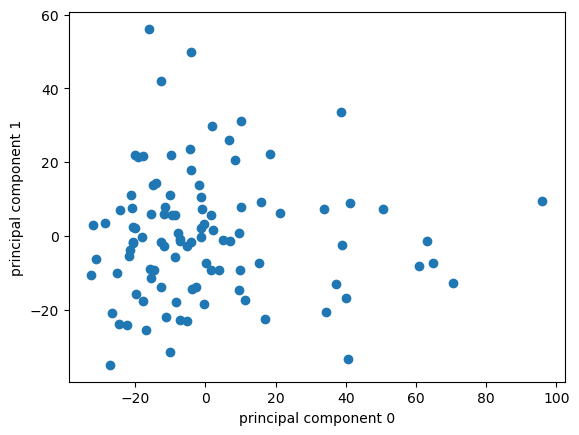

In [15]:
plt.scatter(data_reduced[:,0], data_reduced[:,1])
plt.xlabel(f'principal component 0')
plt.ylabel(f'principal component 1')
plt.show()

In [ ]:
# TODO: Include Scree Plot

In [ ]:
# TODO: Include Loading Plot

# Anomaly Detection
On the [site on anomaly detection](https://scikit-learn.org/stable/modules/outlier_detection.html) on scikit-learn, the two algorithms isolation forest and local outlier factor score the best.

Use the Isolation Forest here because it provides decision boundaries.

In [10]:
# TODO: Tweak parameters so that not all instances are categorized the same way
clf = IsolationForest(max_samples=2, random_state=42)
clf.fit(X=pca.components_)

IsolationForest(max_samples=2, random_state=42)